In [8]:
import scipy.stats as scs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30/365.
I = 10000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))


In [10]:
R_gbm = np.sort(ST-S0)

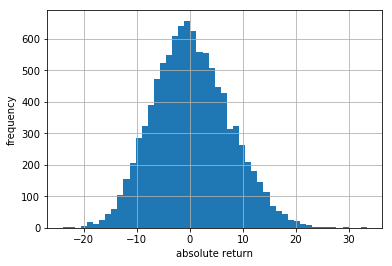

In [11]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [13]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print "%16s %16s" % ('Confidence Level', 'Value-at-Risk')
print 33 * "-"
for pair in zip(percs, var):
    print "%16.2f %16.3f" % (100 - pair[0],-pair[1])

Confidence Level    Value-at-Risk
---------------------------------
           99.99           23.898
           99.90           19.488
           99.00           15.010
           97.50           12.728
           95.00           10.971
           90.00            8.799


In [24]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0
M = 50
dt = 30./365/M

rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = np.random.standard_normal((M + 1, I))
sn2 = np.random.standard_normal((M + 1, I))
poi = np.random.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1[t]) + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)
R_jd = np.sort(S[-1] - S0)


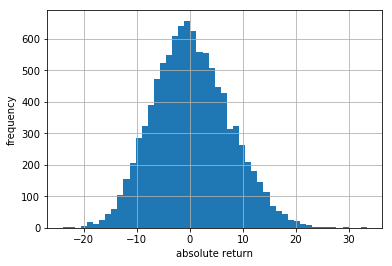

In [25]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [26]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print "%16s %16s" % ('Confidence Level', 'Value-at-Risk')
print 33 * "-"
for pair in zip(percs, var):
    print "%16.2f %16.3f" % (100 - pair[0],-pair[1])

Confidence Level    Value-at-Risk
---------------------------------
           99.99           82.726
           99.90           76.482
           99.00           57.296
           97.50           46.994
           95.00           26.707
           90.00            6.516


(-89.431860268136504, 0.0)

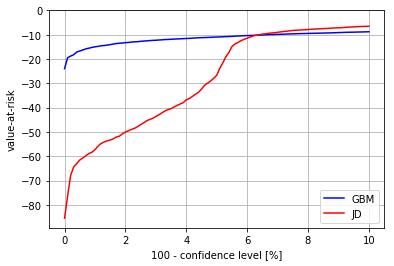

In [27]:
percs = list(np.arange(0.0,10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax=0.0)
